In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [2]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    fft_im = np.fft.fft2(im)
    fft_im = np.fft.fftshift(fft_im)
    fft_result = fft_im * fft_kernel
    conv_result = np.abs(np.fft.ifft2(fft_result))

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        # Visualize FFT
        plt.subplot(1, 5, 2) 
        plt.imshow(np.log1p(np.abs(fft_im)))
        # Visualize FFT kernel
        plt.subplot(1, 5, 3)
        plt.imshow(np.log1p(np.abs(fft_kernel)), cmap="gray")
        # Visualize filtered FFT image
        plt.subplot(1, 5, 4)
        plt.imshow(np.log1p(np.abs(fft_result)))
        # Visualize filtered spatial image
        plt.subplot(1, 5, 5) 
        plt.imshow(conv_result, cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

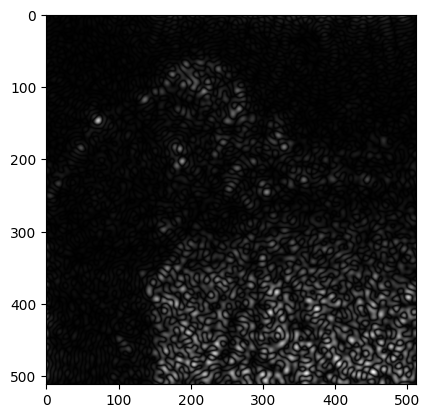

In [3]:

im = skimage.data.camera()
im = utils.uint8_to_float(im)
kernel = utils.create_low_pass_frequency_kernel(im, radius=50)
fft_im = np.fft.fft2(im)
fft_im = np.fft.fftshift(fft_im)
fft_im = fft_im * kernel
im = np.fft.ifft2(fft_im)
im = np.abs(im)

plt.imshow(im, cmap='gray')

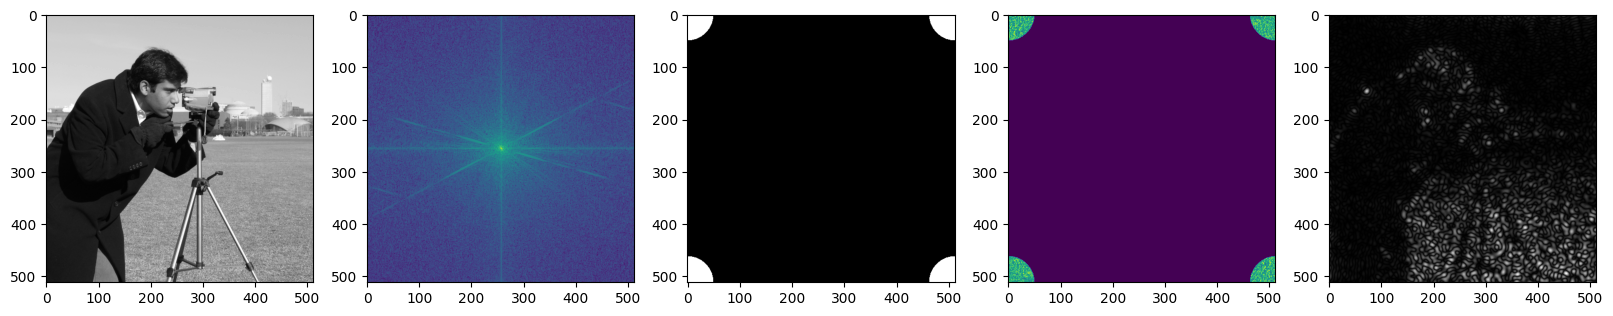

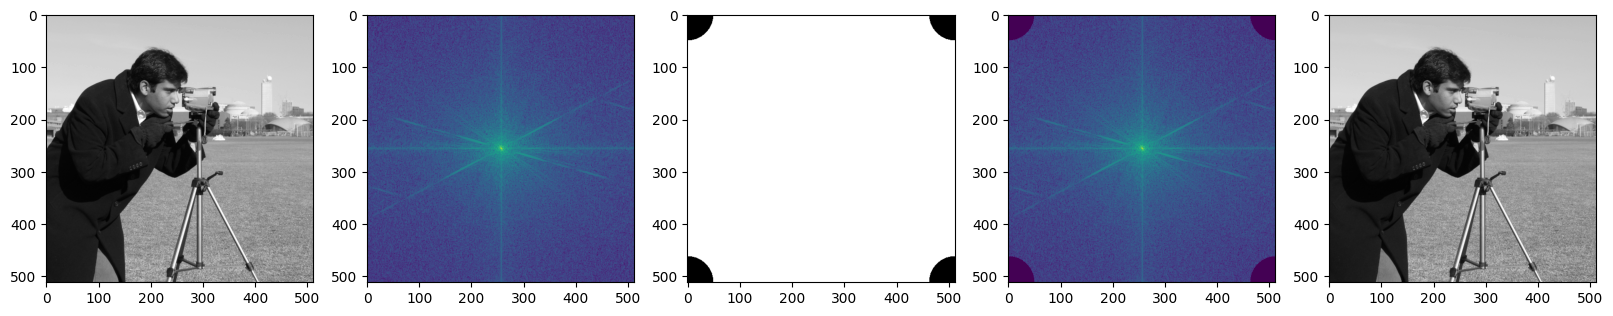

Saving image to: image_processed\camera_low_pass.png
Saving image to: image_processed\camera_high_pass.png


c:\Users\andre\OneDrive\uni\7.semester\Grunnleggende_visuell_databehandling\IP-assignments\assignment 2\utils.py:94: UserWarning: image_processed\camera_low_pass.png is a low contrast image
  skimage.io.imsave(impath, im)
c:\Users\andre\OneDrive\uni\7.semester\Grunnleggende_visuell_databehandling\IP-assignments\assignment 2\utils.py:82: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [4]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)